In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load Data

In [2]:
df=pd.read_csv("fulfilment_center_info.csv")
print(df.head(10))

   center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6
5         64        553           77      TYPE_A      4.4
6        129        593           77      TYPE_A      3.9
7        139        693           34      TYPE_C      2.8
8         88        526           34      TYPE_A      4.1
9        143        562           77      TYPE_B      3.8


In [3]:
df1=pd.read_csv("meal_info.csv")
print(df1.head())

   meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian


In [4]:
#'BE'-Beverages,Extras
#'SOS-Soup, Other Snacks, Salad
#'RSS'-Rice Bowl, Starters, Sandwich
#'PDB'-Pasta, Desert, Biryani
#'PFS'-Pizza, Fish, Seafood

grouped_categories = {
    'BE': ['Beverages', 'Extras'],
    'SOS': ['Soup', 'Other Snacks', 'Salad'],
    'RSS': ['Rice Bowl', 'Starters', 'Sandwich'],
    'PDB': ['Pasta', 'Desert', 'Biryani'],
    'PFS': ['Pizza', 'Fish', 'Seafood']
}

# Assign group numbers based on category
def assign_group(category):
    for group_category, categories in grouped_categories.items():
        if category in categories:
            return group_category
    return None

df1['group'] = df1['category'].apply(assign_group)

# Display the updated dataset with groups
print(df1.head(10))


   meal_id   category  cuisine group
0     1885  Beverages     Thai    BE
1     1993  Beverages     Thai    BE
2     2539  Beverages     Thai    BE
3     1248  Beverages   Indian    BE
4     2631  Beverages   Indian    BE
5     1311     Extras     Thai    BE
6     1062  Beverages  Italian    BE
7     1778  Beverages  Italian    BE
8     1803     Extras     Thai    BE
9     1198     Extras     Thai    BE


In [5]:
df1['group'].value_counts()

group
BE     15
SOS     9
RSS     9
PDB     9
PFS     9
Name: count, dtype: int64

In [6]:
df_train=pd.read_csv("train.csv")
df_train.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [7]:
df_train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [8]:
df.columns


Index(['center_id', 'city_code', 'region_code', 'center_type', 'op_area'], dtype='object')

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [10]:
# Merge category counts into df1 based on category names
df_merged = pd.merge(df1, df_train)

# Display the merged dataset
print(df_merged)

        meal_id   category      cuisine group       id  week  center_id  \
0          1885  Beverages         Thai    BE  1379560     1         55   
1          1885  Beverages         Thai    BE  1040403     1         24   
2          1885  Beverages         Thai    BE  1103215     1         11   
3          1885  Beverages         Thai    BE  1034383     1         83   
4          1885  Beverages         Thai    BE  1118999     1         32   
...         ...        ...          ...   ...      ...   ...        ...   
456543     1445    Seafood  Continental   PFS  1242817   145        132   
456544     1445    Seafood  Continental   PFS  1321101   145         86   
456545     1445    Seafood  Continental   PFS  1189559   145         68   
456546     1445    Seafood  Continental   PFS  1288412   145         51   
456547     1445    Seafood  Continental   PFS  1055597   145         61   

        checkout_price  base_price  emailer_for_promotion  homepage_featured  \
0               136

In [11]:
df_train['center_id'].value_counts()

center_id
13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: count, Length: 77, dtype: int64

In [12]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define a function to fit the ARIMA model and calculate the MSE
def fit_arima_and_evaluate(df_train, order=(5, 1, 0)):
    train_size = int(len(df_train) * 0.8)
    train, test = df_train[:train_size], df_train[train_size:]
    
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    
    predictions = model_fit.forecast(steps=len(test))
    mse = mean_squared_error(test, predictions)
    
    return mse, model_fit

# Group data by center_id and apply the function
results = {}

for center_id, group in df_train.groupby('center_id'):
    num_orders = group['num_orders'].values
    mse, model_fit = fit_arima_and_evaluate(num_orders)
    results[center_id] = mse

# Find the center_id with the lowest MSE
best_center_id = min(results, key=results.get)
best_mse = results[best_center_id]

print(f'The best center_id for forecasting is {best_center_id} with a MSE of {best_mse}')


The best center_id for forecasting is 74 with a MSE of 14812.155428993103


In [13]:
selected_center=df_merged[df_merged['center_id']==74]
selected_center

,meal_id,category,cuisine,group,id,week,center_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
17,1885,Beverages,Thai,BE,1426763,1,74,118.40,118.40,0,0,257
94,1885,Beverages,Thai,BE,1068800,2,74,101.91,117.40,1,0,325
171,1885,Beverages,Thai,BE,1101624,3,74,96.03,118.40,0,0,595
248,1885,Beverages,Thai,BE,1249477,4,74,122.28,116.40,0,1,406
324,1885,Beverages,Thai,BE,1221878,5,74,119.34,116.40,0,1,393
...,...,...,...,...,...,...,...,...,...,...,...,...
456028,1445,Seafood,Continental,PFS,1211591,137,74,765.33,767.33,0,0,15
456135,1445,Seafood,Continental,PFS,1187376,139,74,726.53,728.53,0,0,14
456302,1445,Seafood,Continental,PFS,1010528,142,74,728.53,726.53,0,0,14
456359,1445,Seafood,Continental,PFS,1496915,143,74,582.03,728.53,0,0,53


In [14]:
missing=selected_center.isnull().sum()
print("Missing Values:\n", missing)


Missing Values:
 meal_id                  0
category                 0
cuisine                  0
group                    0
id                       0
week                     0
center_id                0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64


In [15]:
selected_center['checkout_price'].value_counts()

checkout_price
282.33    112
281.33    106
280.33    103
641.23     83
640.23     63
         ... 
212.43      1
348.29      1
359.90      1
380.30      1
531.59      1
Name: count, Length: 901, dtype: int64

In [16]:
selected_center['base_price'].value_counts()

base_price
281.33    127
639.23    120
282.33    115
280.33    104
641.23    101
         ... 
353.08      1
303.64      1
304.61      1
310.46      1
714.92      1
Name: count, Length: 652, dtype: int64

In [17]:
selected_center['center_id'].value_counts()

center_id
74    5264
Name: count, dtype: int64

In [18]:
correlation = selected_center['base_price'].corr(selected_center['checkout_price'])
print(f"The correlation between duration in months and credit amount is: {correlation}")

The correlation between duration in months and credit amount is: 0.9559211947339629


# Visualization

This observation indicates that the base prices (the initial prices of products before any discounts) tend to cluster within a narrower price range, suggesting a more uniform pricing strategy. In contrast, the checkout prices (the prices after discounts are applied) show a broader distribution, reflecting the impact of varying discount levels.

To delve deeper into this, you could analyze the distribution of the discount percentages applied to understand their effect on the final checkout prices. Additionally, comparing the means and standard deviations of base prices and checkout prices can provide further insights into their variability and central tendencies.







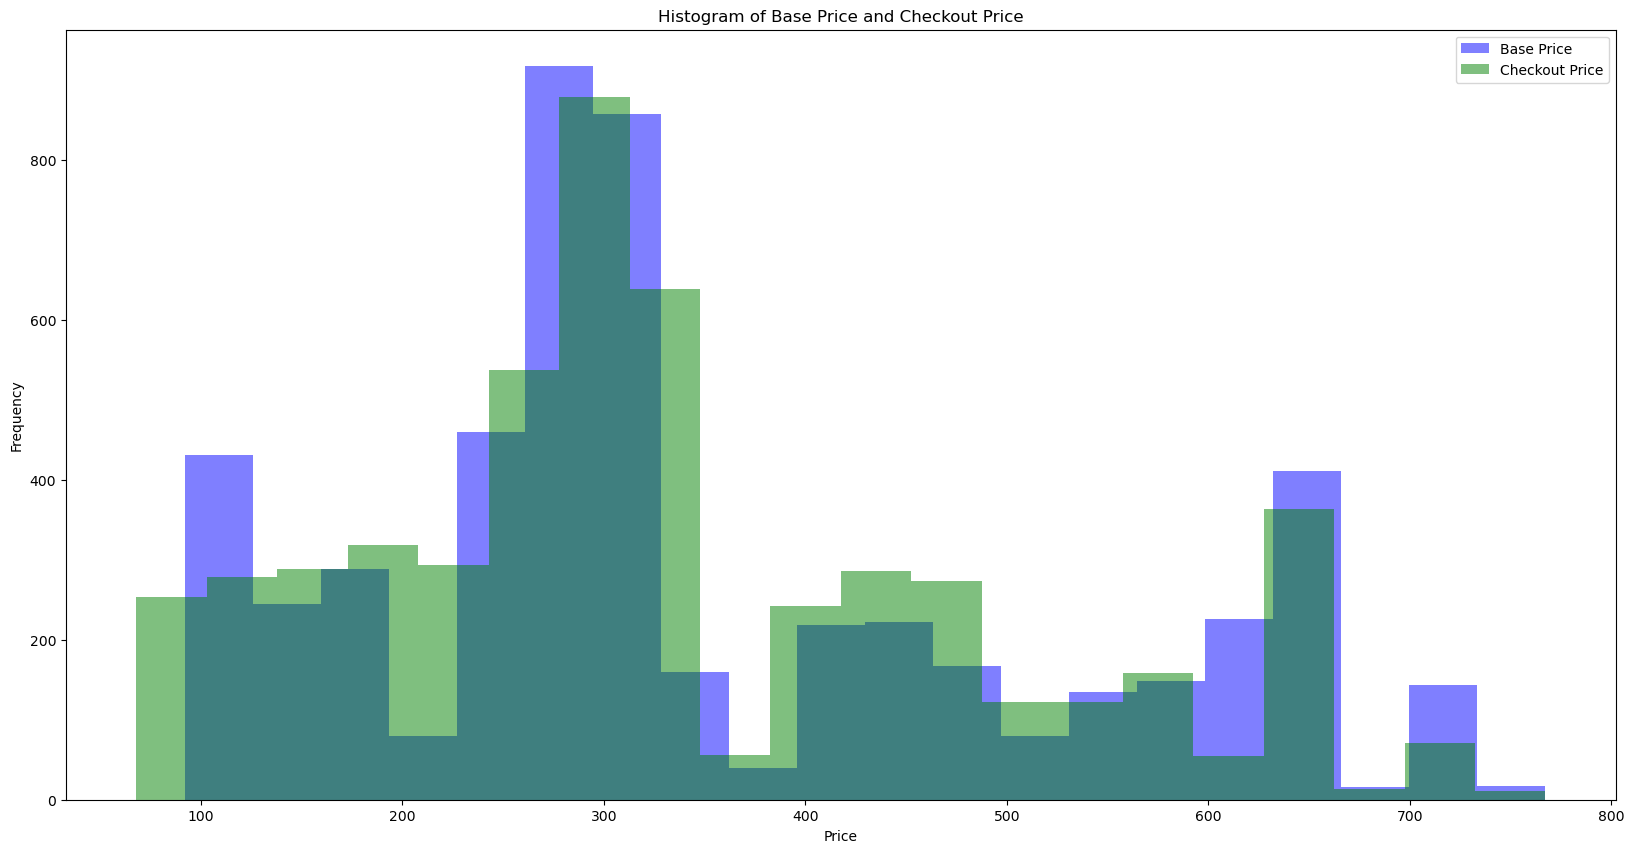

In [19]:

# Plotting
plt.figure(figsize=(20, 10))

# Plot histogram for base_price
plt.hist(selected_center['base_price'], bins=20, color='blue', alpha=0.5, label='Base Price')

# Plot histogram for checkout_price
plt.hist(selected_center['checkout_price'], bins=20, color='green', alpha=0.5, label='Checkout Price')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Base Price and Checkout Price')
plt.legend()
plt.show()

The resulting bar chart will show the number of orders for each category, providing a clear visual representation of the distribution of orders among different category types. This helps in understanding which category are more popular based on the number of orders

The visualization aims to show the distribution of the number of orders across different groups. This can help identify which groups have higher or lower order volumes, providing insights into group performance or demand patterns.


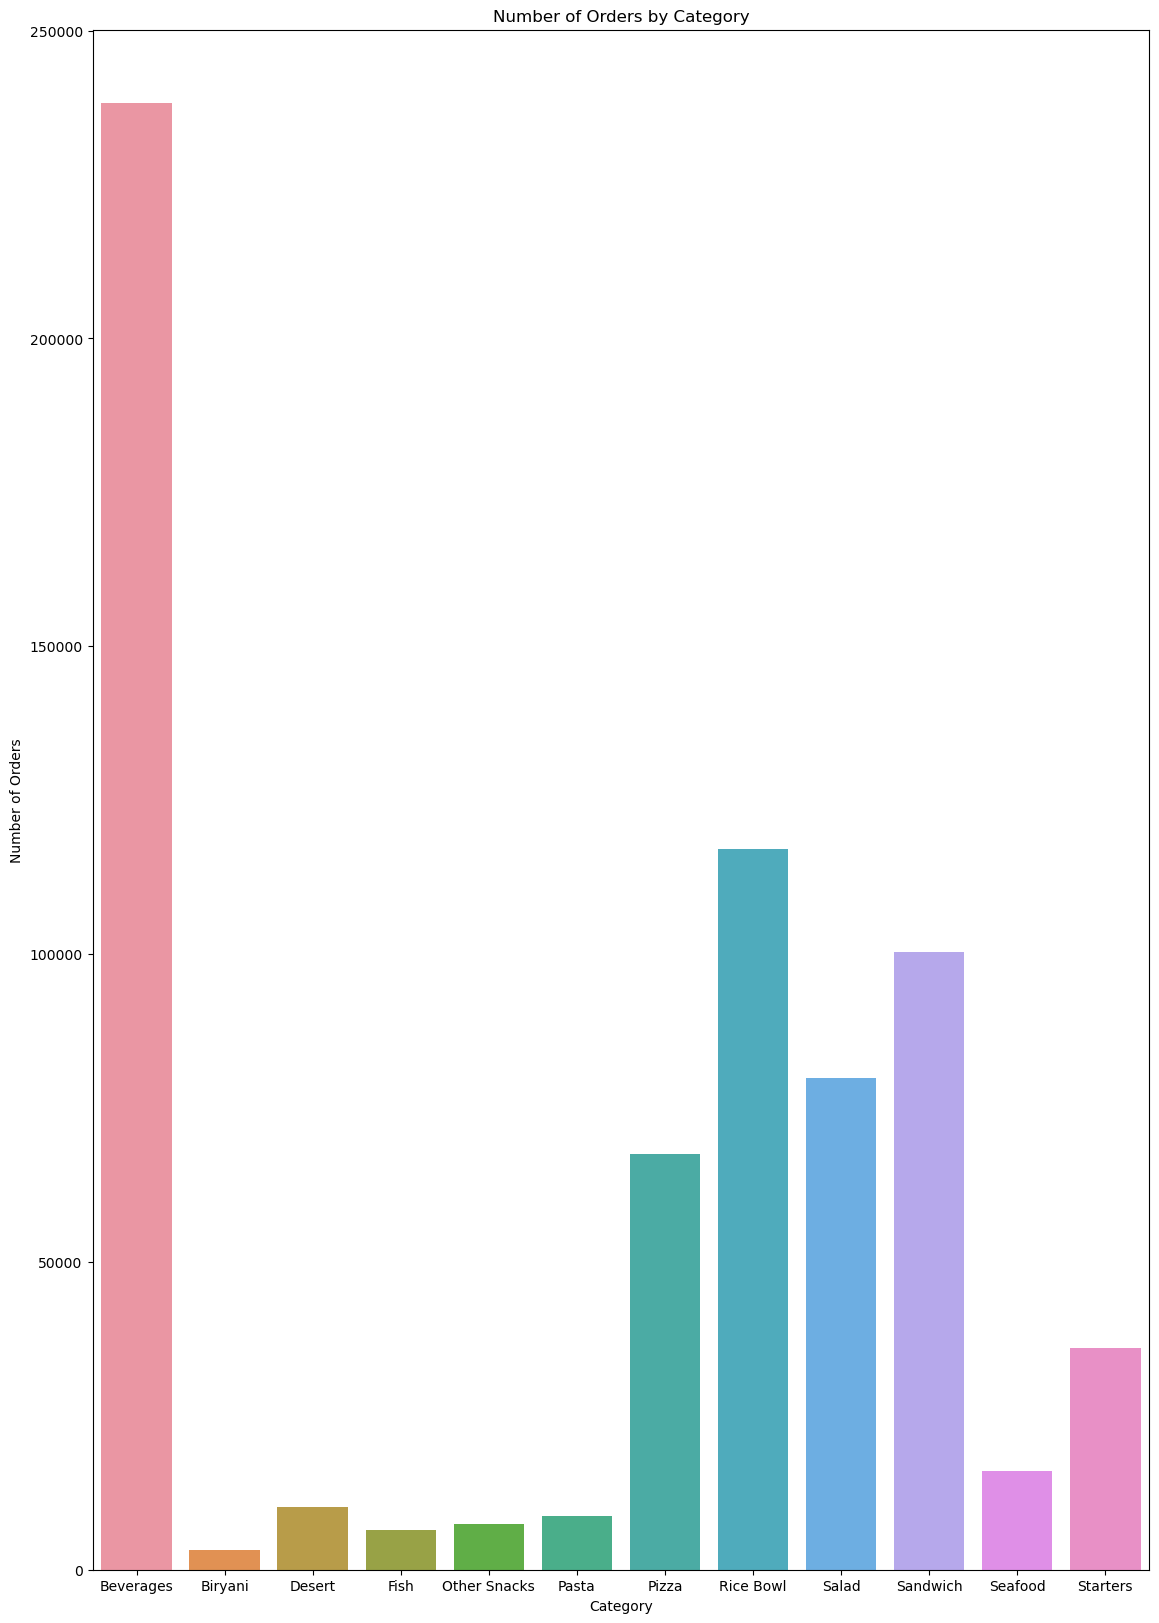

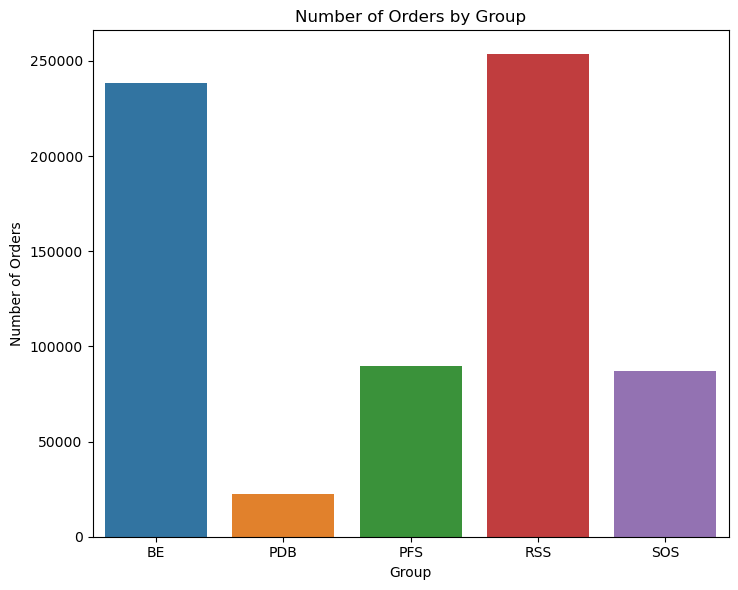

<Figure size 640x480 with 0 Axes>

In [20]:
# Aggregating data by center and group
group_orders = selected_center.groupby('category')['num_orders'].sum().reset_index()

# Plotting
plt.figure(figsize=(30, 20))

# Bar plot for groups
plt.subplot(1, 2, 2)
sns.barplot(y='num_orders', x='category', data=group_orders)
plt.title('Number of Orders by Category')
plt.ylabel('Number of Orders')
plt.xlabel('Category')

# Aggregating data by center and group
group_orders = selected_center.groupby('group')['num_orders'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 6))

# Bar plot for groups
plt.subplot(1, 2, 2)
sns.barplot(y='num_orders', x='group', data=group_orders)
plt.title('Number of Orders by Group')
plt.ylabel('Number of Orders')
plt.xlabel('Group')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()




The resulting bar chart will show the number of orders for each cuisine, providing a clear visual representation of the distribution of orders among different cuisine types. This helps in understanding which cuisines are more popular based on the number of orders.




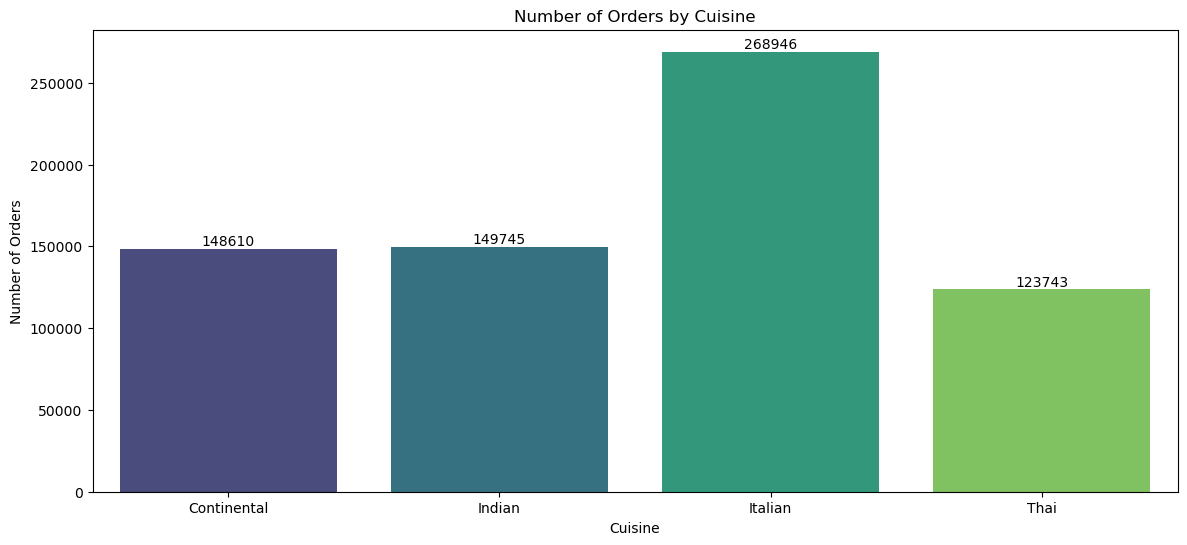

In [21]:
# Aggregating data by center and group
cuisine_orders = selected_center.groupby('cuisine')['num_orders'].sum().reset_index()

# Bar plot for cuisines
plt.figure(figsize=(14, 6))
sns.barplot(y='num_orders', x='cuisine', data=cuisine_orders, palette='viridis')
plt.title('Number of Orders by Cuisine')
plt.ylabel('Number of Orders')
plt.xlabel('Cuisine')

# Annotating bars with their corresponding values
for index, value in enumerate(cuisine_orders ['num_orders']):
    plt.text(index, value, str(value), ha='center', va='bottom')


In [15]:
selected_id=selected_center.drop(columns=(['id','center_id','category','cuisine','group','meal_id']))
print(selected_id)

        week  checkout_price  base_price  emailer_for_promotion  \
17         1          118.40      118.40                      0   
94         2          101.91      117.40                      1   
171        3           96.03      118.40                      0   
248        4          122.28      116.40                      0   
324        5          119.34      116.40                      0   
...      ...             ...         ...                    ...   
456028   137          765.33      767.33                      0   
456135   139          726.53      728.53                      0   
456302   142          728.53      726.53                      0   
456359   143          582.03      728.53                      0   
456433   144          581.03      728.53                      1   

        homepage_featured  num_orders  
17                      0         257  
94                      0         325  
171                     0         595  
248                     1         4

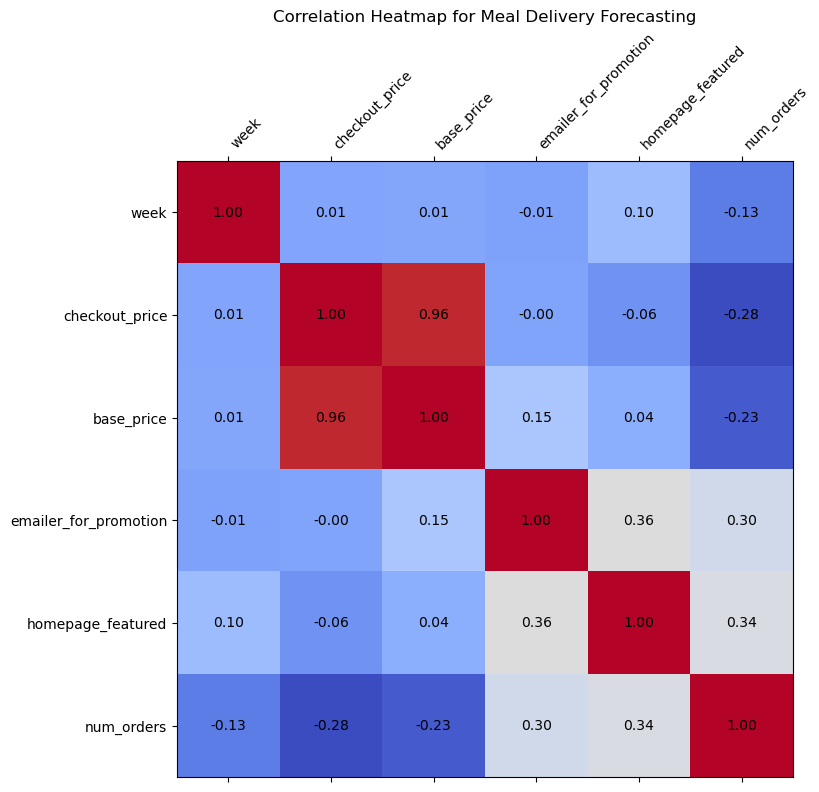

In [16]:
correlation_matrix = selected_id.corr()


# Step 3: Plot heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap
cax = ax.matshow(correlation_matrix, cmap='coolwarm')



# Set axis labels
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='left')
ax.set_yticklabels(correlation_matrix.columns)

# Annotate each cell with the correlation value
for (i, j), val in np.ndenumerate(correlation_matrix):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Heatmap for Meal Delivery Forecasting')
plt.show()

The histogram of base prices can provide valuable insights into pricing strategies. To analyze this, let's consider a dataset of base prices and create a histogram. This will help us visualize how the prices are distributed, particularly if there are clusters around certain price points, indicating potential pricing strategies like discounts or premium offers.

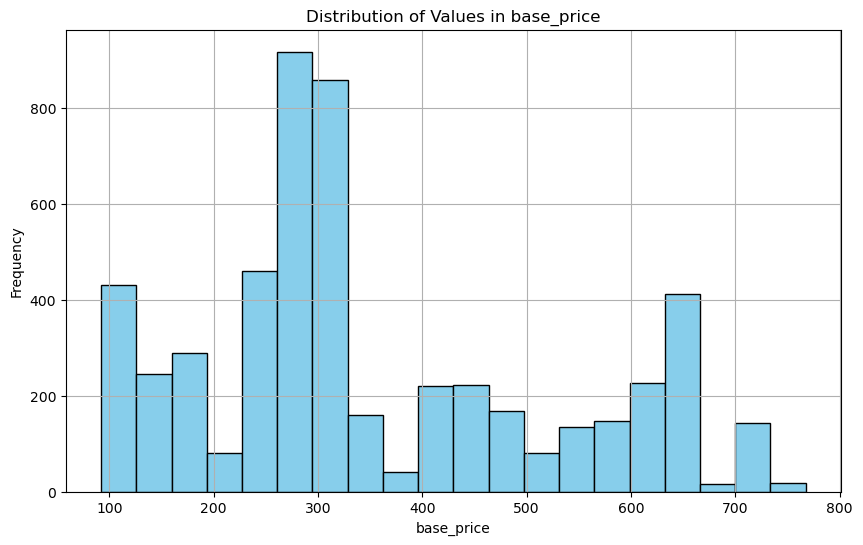

In [24]:
column_to_visualize = 'base_price'

# Plotting a histogram of the selected column
plt.figure(figsize=(10, 6))
plt.hist(selected_center[column_to_visualize], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Values in {}'.format(column_to_visualize))
plt.xlabel(column_to_visualize)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [25]:
selected_center['num_orders'].value_counts()

num_orders
14      267
13      256
15      244
28      189
27      178
       ... 
742       1
838       1
906       1
1148      1
636       1
Name: count, Length: 179, dtype: int64

In [26]:
selected_center['homepage_featured'].value_counts()

homepage_featured
0    4826
1     438
Name: count, dtype: int64


To visualize the relationship between the number of orders and the frequency of email promotions over time, we can create a line plot with two y-axes: one for the number of orders and the other for the frequency of email promotions. This will help us observe potential correlations or effects of promotional activities on order volumes.

Conceptual Steps

Data Preparation:

Gather data on the number of orders and the frequency of email promotions over time.

Plotting:

Use one line to plot the number of orders over time.

Use another line to plot the frequency of email promotions over time.

Utilize dual y-axes to show both metrics clearly.







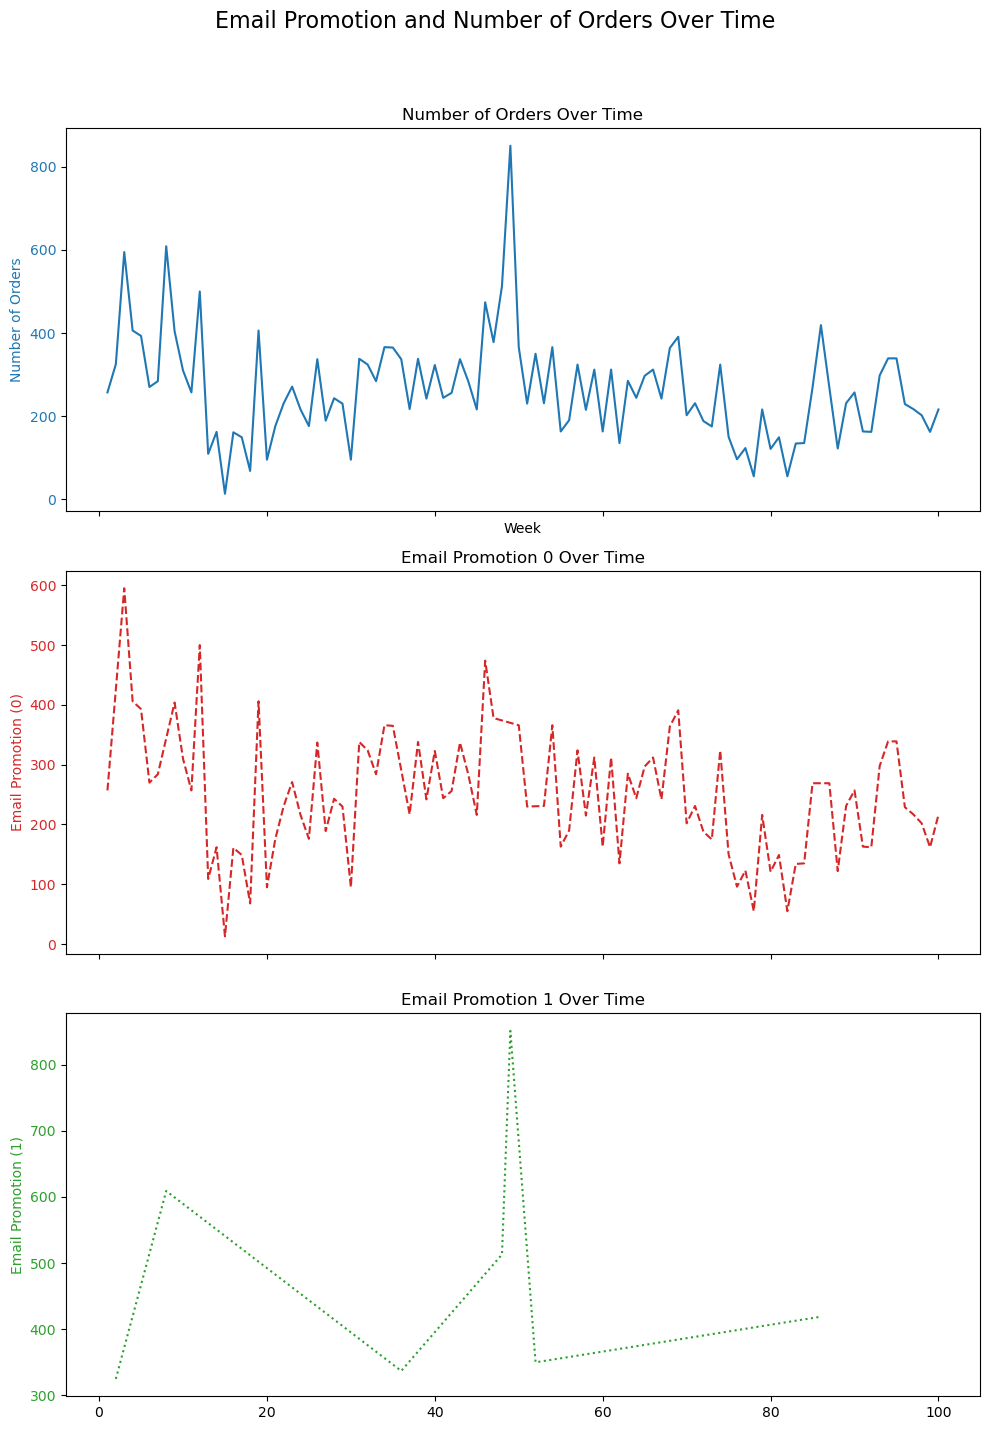

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for weeks 0 to 145
filtered_data = selected_center[(selected_center['week'] >= 0) & (selected_center['week'] <= 145)]
random_value = filtered_data.iloc[:100]

# Plotting the data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)


# Plot num_orders
ax1.set_xlabel('Week')
ax1.set_ylabel('Number of Orders', color='tab:blue')
ax1.plot(random_value['week'], random_value['num_orders'], color='tab:blue', label='Number of Orders')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Number of Orders Over Time')

# Plot email promotion 0
email_promotion_0 = random_value[random_value['emailer_for_promotion'] == 0]
ax2.set_ylabel('Email Promotion (0)', color='tab:red')
ax2.plot(email_promotion_0['week'], email_promotion_0['num_orders'], color='tab:red', linestyle='dashed', label='Email Promotion 0')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_title('Email Promotion 0 Over Time')

# Plot email promotion 1
email_promotion_1 = random_value[random_value['emailer_for_promotion'] == 1]
ax3.set_ylabel('Email Promotion (1)', color='tab:green')
ax3.plot(email_promotion_1['week'], email_promotion_1['num_orders'], color='tab:green', linestyle='dotted', label='Email Promotion 1')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.set_title('Email Promotion 1 Over Time')

# Title and layout
fig.suptitle('Email Promotion and Number of Orders Over Time', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title

plt.show()

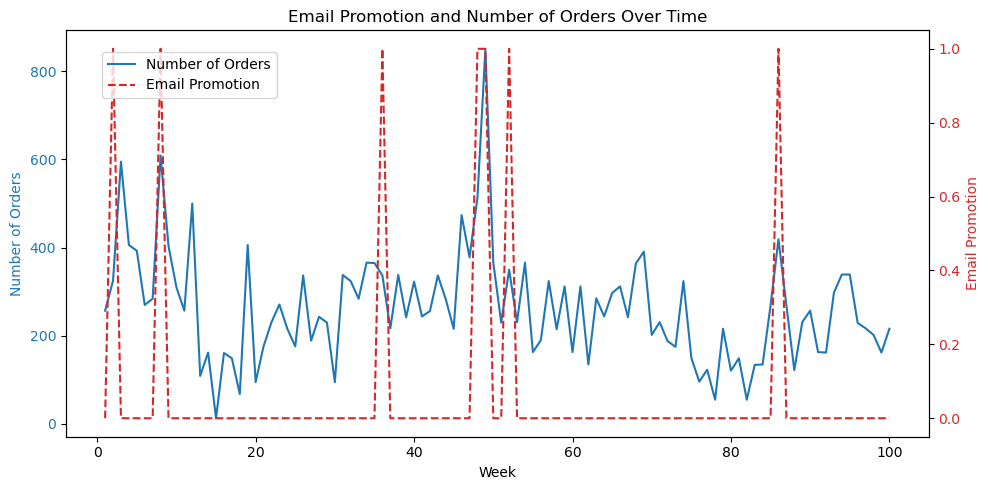

In [28]:
# Assuming 'selected_center' is your DataFrame containing the relevant data
# Filter data for weeks 0 to 145
filtered_data = selected_center[(selected_center['week'] >= 0) & (selected_center['week'] <= 145)]
random_value=filtered_data.iloc[:100]
# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot num_orders
color = 'tab:blue'
ax1.set_xlabel('Week')
ax1.set_ylabel('Number of Orders', color=color)
ax1.plot(random_value['week'], random_value['num_orders'], color=color, label='Number of Orders')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot emailer_for_promotion
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Email Promotion', color=color)
ax2.plot(random_value['week'], random_value['emailer_for_promotion'], color=color, label='Email Promotion', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Email Promotion and Number of Orders Over Time')
fig.tight_layout()  # To ensure the right y-label is not slightly clipped
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.show()

The bar plot visualizes the number of orders over weeks for Center ID 74, illustrating variations and trends in order volumes across different weeks.

To create a bar plot illustrating the number of orders over weeks for Center ID 74, we can follow these steps:

Data Preparation: Ensure you have data that includes weeks and the corresponding number of orders for Center ID 74.

Plotting: Use a bar plot to visualize this data, where weeks are on the x-axis and the number of orders on the y-axis.

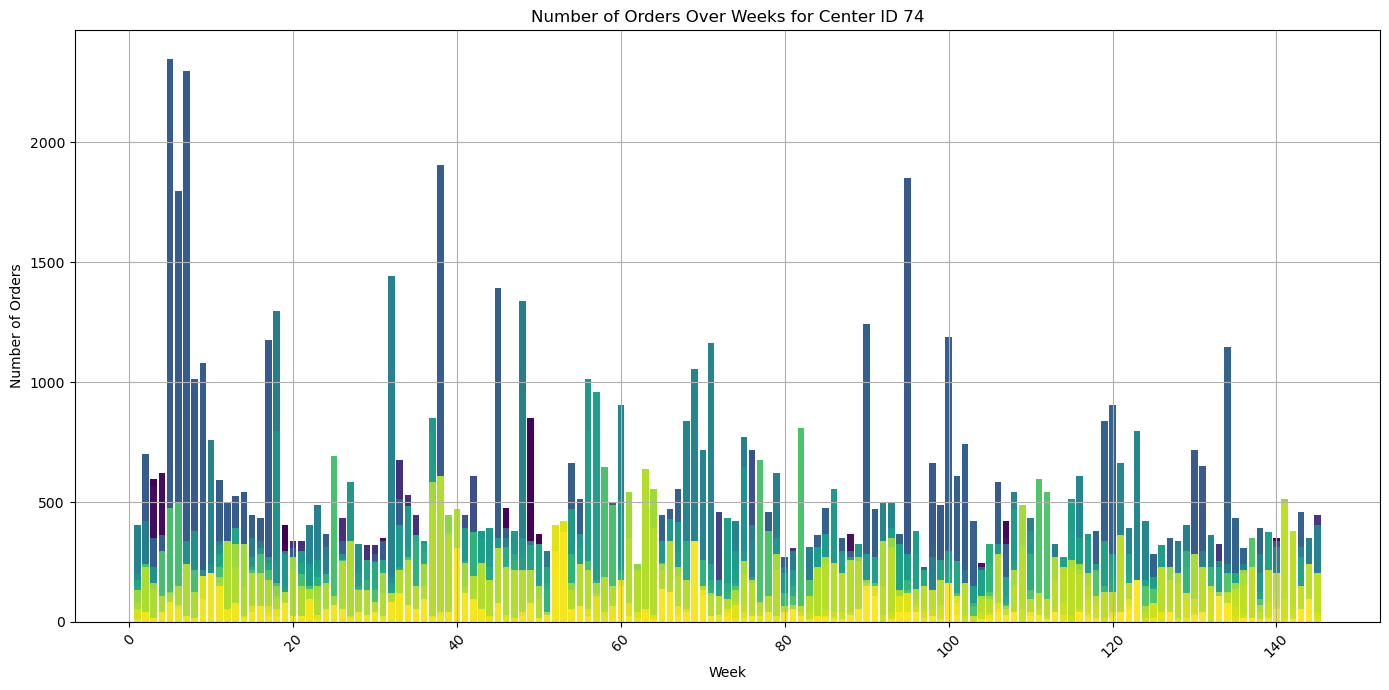

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_center)))

plt.figure(figsize=(14, 7))
plt.bar(selected_center['week'], selected_center['num_orders'], color=colors)
plt.title('Number of Orders Over Weeks for Center ID 74')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Forecasting

This code imports libraries and modules for time series analysis, ARIMA modeling, and statistical tests in Python, including functions for data manipulation, plotting, model fitting, and evaluation.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

This code performs the Augmented Dickey-Fuller (ADF) test on the num_orders column from the selected_center DataFrame to check for stationarity in the time series data:

In [18]:
adf_test = adfuller(selected_center['num_orders'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

ADF Statistic: -5.265542112457218
p-value: 6.451149421205343e-06


This code snippet generates a visualization to analyze the autocorrelation and partial autocorrelation of the num_orders time series

The ACF plot helps identify the overall correlation of the time series with its past values.

The PACF plot helps identify the correlation of the time series with its past values, removing the influence of intermediate lags

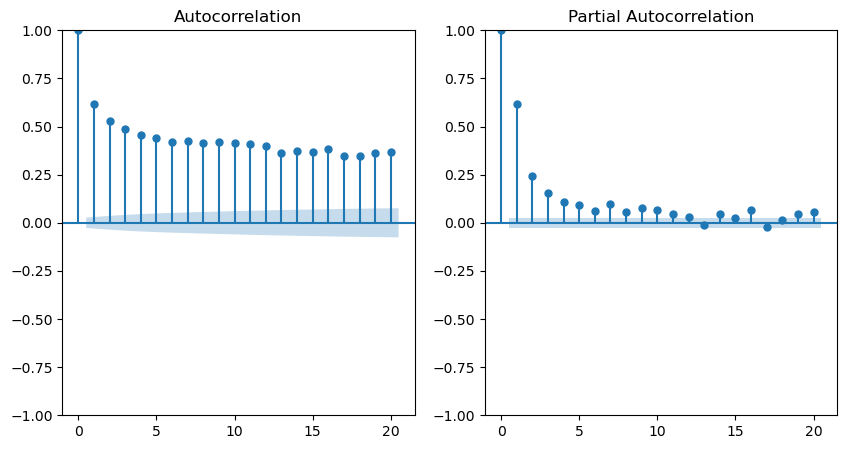

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_acf(selected_center['num_orders'], lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(selected_center['num_orders'], lags=20, ax=plt.gca())
plt.show()

# Arima Model

The total number of orders for each week. By grouping by week and summing the orders, you get a weekly aggregate which helps in analyzing trends and patterns over time. Sorting by week ensures that the data is in the correct chronological order for further analysis or plotting.

In [20]:
# Aggregate the num_orders by week
weekly_orders = selected_center.groupby('week')['num_orders'].sum().sort_index()

# Print the aggregated data to check
print(weekly_orders.head())

week
1    3782
2    5818
3    4530
4    5149
5    7045
Name: num_orders, dtype: int64


This code snippet fits an ARIMA model to the weekly_orders time series data
p (Auto-Regressive term): Determines the number of past observations used in the model.
p = 5: Number of lag observations included in the model (Auto-Regressive term)
d (Integration term): Represents the number of times the data has been differenced to achieve stationarity.
d = 0: Number of times that the raw observations are differenced (Integration term). In this case, the data is already stationary, so no differencing is applied.
q (Moving Average term): Indicates the number of lagged forecast errors in the model.
q = 15: Size of the moving average window (Moving Average term).

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming particular_id['num_orders'] is your time series data
model = ARIMA(weekly_orders, order=(5,0,15))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\supri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                  145
Model:                ARIMA(5, 0, 15)   Log Likelihood               -1180.279
Date:                Thu, 01 Aug 2024   AIC                           2404.557
Time:                        11:36:26   BIC                           2470.045
Sample:                             0   HQIC                          2431.167
                                - 145                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4765.8205    727.187      6.554      0.000    3340.560    6191.081
ar.L1          0.2967      0.174      1.704      0.088      -0.045       0.638
ar.L2         -0.1386      0.172     -0.806      0.4

C:\Users\supri\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Residuals Plot: The residuals are the differences between observed and predicted values on the y-axis against the fitted values (predicted values) on the x-axis.Most residuals fall between -2 and 2, indicating that the errors are relatively small and evenly distributed.

Density Plot:A bell-shaped curve centered around zero is a positive indicator that your model is capturing the underlying data patterns effectively. This suggests that your model's predictions are close to the actual values, with random errors.

residual density plot indicates a good model fit with normally distributed residuals.

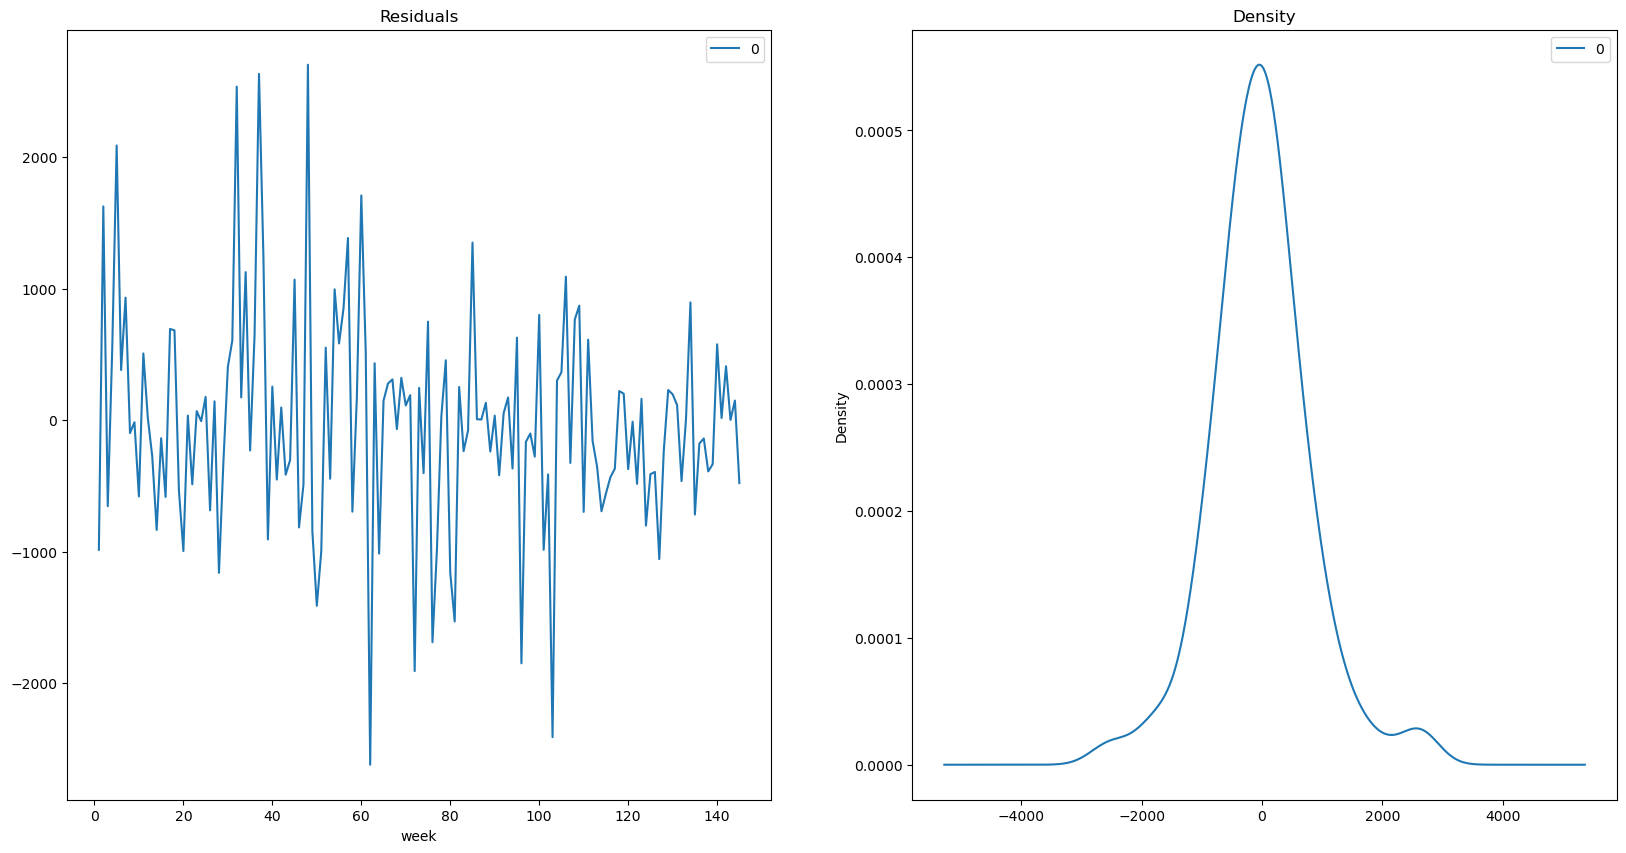

In [56]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(20,10))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


Visualize the actual data, fitted values, and optionally forecasts from a time series model. If your data is stationary, the graph produced by plot_predict will still display the actual values and fitted values.

Actual Data: The true values of the time series.

Fitted Values: The values predicted by the ARIMA model based on the observed data.

The plot helps you assess how well the model captures the patterns in the actual data. Ideally, the fitted values should closely follow the actual values, indicating a good fit of the model to the historical data

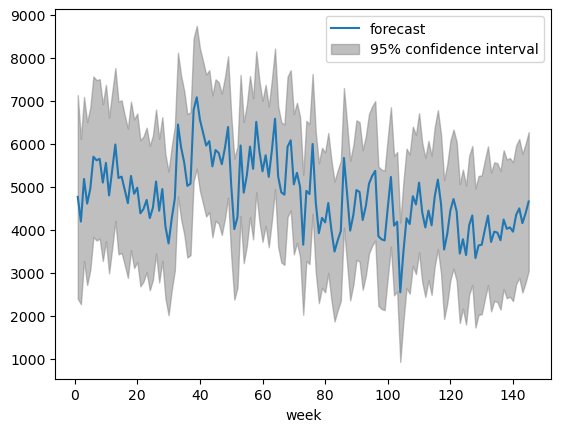

In [39]:
# Actual vs Fitted
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots()
plot_predict(model_fit, dynamic=False, ax=ax)
plt.show()

This code snippet forecasts the number of orders for the next 10 weeks using the fitted ARIMA model and visualizes the forecast along with the actual data
Forecasting: The ARIMA model generates predictions for the upcoming weeks based on the historical data.

Plotting: The plot shows how well the model's forecasts align with historical data and includes confidence intervals to indicate the range of uncertainty in the forecasts.

Printed Forecasts: Provides the specific forecasted values for further analysis or reporting.

C:\Users\supri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


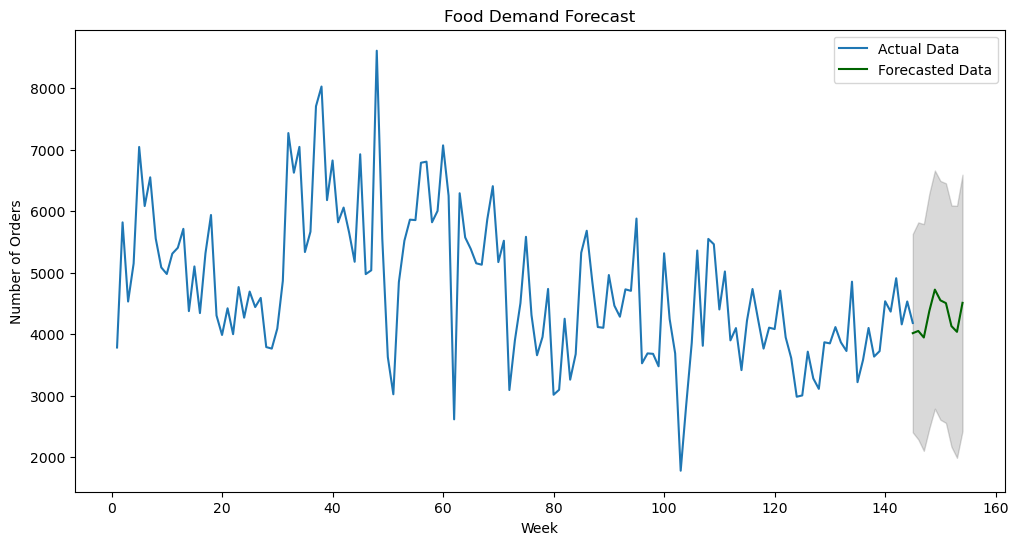

Forecasted values for the next 10 weeks (weeks 146 to 155):
145    4015.286602
146    4051.197081
147    3944.809886
148    4376.958964
149    4723.758041
150    4549.724075
151    4504.051063
152    4129.846570
153    4036.793521
154    4508.548182
Name: predicted_mean, dtype: float64


In [49]:

# Forecast the next 10 weeks
n_periods = 10
forecast = model_fit.get_forecast(steps=n_periods)
fc_series = forecast.predicted_mean
fc_conf = forecast.conf_int()

# Create index for the forecasted values (weeks 146 to 155)
index_of_fc = np.arange(len(weekly_orders), len(weekly_orders) + n_periods)

# Make series for plotting purpose
fc_series.index = index_of_fc
lower_series = pd.Series(fc_conf.iloc[:, 0], index=index_of_fc)
upper_series = pd.Series(fc_conf.iloc[:, 1], index=index_of_fc)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(weekly_orders, label='Actual Data')
plt.plot(fc_series, label='Forecasted Data', color='darkgreen')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title("Food Demand Forecast")
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

# Print forecasted values for the next 10 weeks
print("Forecasted values for the next 10 weeks (weeks 146 to 155):")
print(fc_series)


# actual and predicted plot


This code snippet compares the actual data with the fitted (predicted) values from the ARIMA model within the range of the original data.

Fitted Values: These are the values predicted by the ARIMA model for the historical data. They show how well the model has captured the patterns in the data.

Plot: The plot allows you to visually compare the actual data with the predicted data. Ideally, the fitted values should closely follow the actual values, indicating a good model fit.

Printed Fitted Values: Provides the specific predicted values for weeks 0 to 145, which can be used for further analysis or verification.

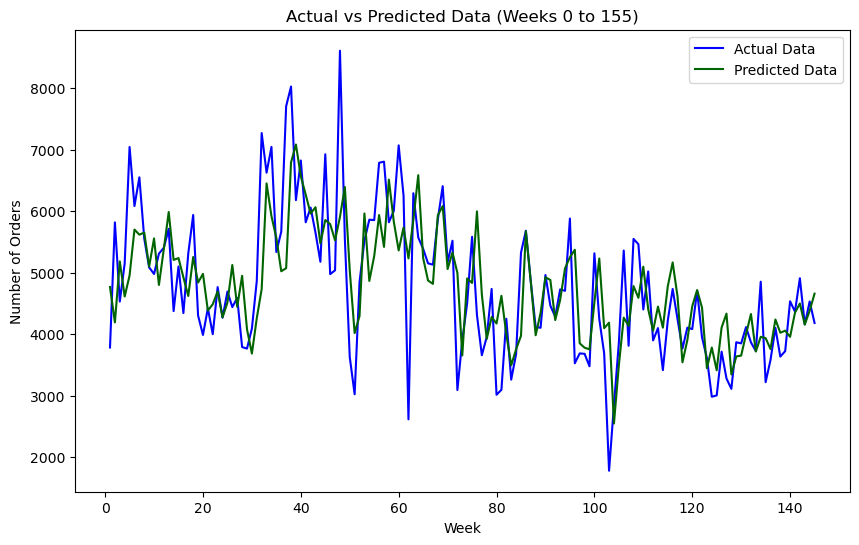

Predicted values (weeks 0 to 155):
week
1      4765.820452
2      4190.848085
3      5182.711587
4      4611.273273
5      4954.714011
          ...     
141    4348.034571
142    4497.570496
143    4154.561696
144    4380.281812
145    4658.182679
Length: 145, dtype: float64


In [25]:

# Get the fitted values (predicted data within the range of the original data)
predicted_values = model_fit.fittedvalues

# Plot actual vs fitted values
plt.figure(figsize=(10, 6))
plt.plot(weekly_orders, label='Actual Data', color='blue')
plt.plot(predicted_values, label='Predicted Data', color='darkgreen')
plt.title("Actual vs Predicted Data (Weeks 0 to 155)")
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

# Print the fitted values for weeks 0 to 145
print("Predicted values (weeks 0 to 155):")
print(predicted_values)


# Arimax Model

This code snippet generates a visualization to analyze the autocorrelation and partial autocorrelation of the base_price time series

The ACF plot helps identify the overall correlation of the time series with its past values.

The PACF plot helps identify the correlation of the time series with its past values, removing the influence of intermediate lags

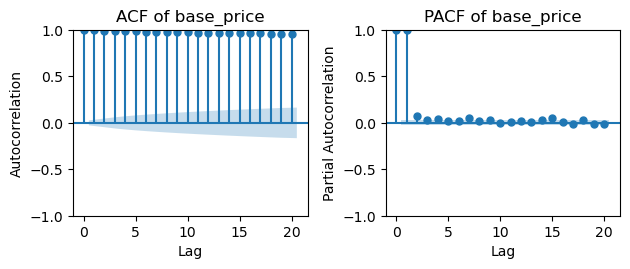

In [26]:
# Plotting ACF and PACF for the emails for promotion
plt.subplot(223)
plot_acf(selected_center['base_price'], lags=20, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF of base_price')

plt.subplot(224)
plot_pacf(selected_center['base_price'], lags=20, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF of base_price')

plt.tight_layout()
plt.show()

This code snippet performs forecasting for the next 10 weeks using an ARIMA model with an exogenous variable.

ARIMA with Exogenous Variables: This model incorporates the impact of an external variable (base price) on the forecasted number of orders. This is useful when external factors are expected to influence the time series.

Forecasting and Plotting: The plot shows both the actual historical data and the forecasted data with confidence intervals, allowing you to visualize the model’s predictions and uncertainty.

Printed Forecasts: Provides the forecasted values for the next 10 weeks, which can be used for further analysis or decision-making.

C:\Users\supri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\supri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be give

                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                  145
Model:                ARIMA(2, 0, 15)   Log Likelihood               -1177.220
Date:                Thu, 01 Aug 2024   AIC                           2394.440
Time:                        12:10:50   BIC                           2453.975
Sample:                             0   HQIC                          2418.631
                                - 145                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2967.7709   1004.589      2.954      0.003     998.813    4936.729
base_price     0.1411      0.073      1.944      0.052      -0.001       0.283
ar.L1          0.7741      0.155      4.992      0.0

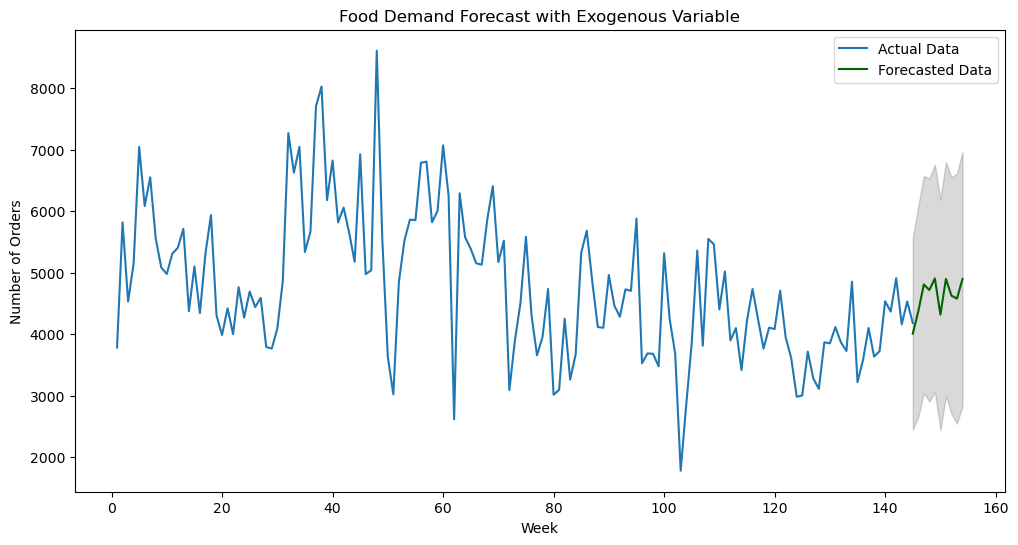

Forecasted values for the next 10 weeks (weeks 146 to 155):
145    4006.946861
146    4370.646674
147    4807.577062
148    4717.327199
149    4906.386307
150    4316.784495
151    4898.390712
152    4625.367877
153    4578.018423
154    4897.004033
Name: predicted_mean, dtype: float64


In [50]:
# Aggregate the num_orders by week
weekly_orders_1 = selected_center.groupby('week')['num_orders'].sum()
exog_data= selected_center.groupby('week')['base_price'].sum()
# Fit an ARIMA model on the full data (weeks 0 to 145) with an exogenous variable
model = ARIMA(weekly_orders_1, exog=exog_data, order=(2, 0, 15))  # Adjust (p, d, q) parameters as needed
model_fit_arimax = model.fit()
print(model_fit_arimax.summary())

# Forecast the next 10 weeks
n_periods = 10
forecast = model_fit_arimax.get_forecast(steps=n_periods, exog=exog_data[-10:])
fc_series = forecast.predicted_mean
fc_conf = forecast.conf_int()

# Create index for the forecasted values (weeks 146 to 155)
index_of_fc = np.arange(len(weekly_orders_1), len(weekly_orders_1) + n_periods)

# Make series for plotting purpose
fc_series.index = index_of_fc
lower_series = pd.Series(fc_conf.iloc[:, 0], index=index_of_fc)
upper_series = pd.Series(fc_conf.iloc[:, 1], index=index_of_fc)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(weekly_orders_1, label='Actual Data')
plt.plot(fc_series, label='Forecasted Data', color='darkgreen')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title("Food Demand Forecast with Exogenous Variable")
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

# Print forecasted values for the next 10 weeks
print("Forecasted values for the next 10 weeks (weeks 146 to 155):")
print(fc_series)


# actual and predicted plot

This code snippet visualizes and prints the fitted values from an ARIMA model with an exogenous variable, comparing them to the actual data:

Fitted Values: These are the values predicted by the ARIMA model based on the historical data. They represent how well the model has captured the patterns in the data.

Plotting: The plot shows a comparison between the actual data and the model's fitted values. A good fit is indicated when the fitted values closely follow the actual data.

Printed Values: Provides the actual numerical predictions for the historical range of data, which can be used for further analysis or verification of the model's performance.


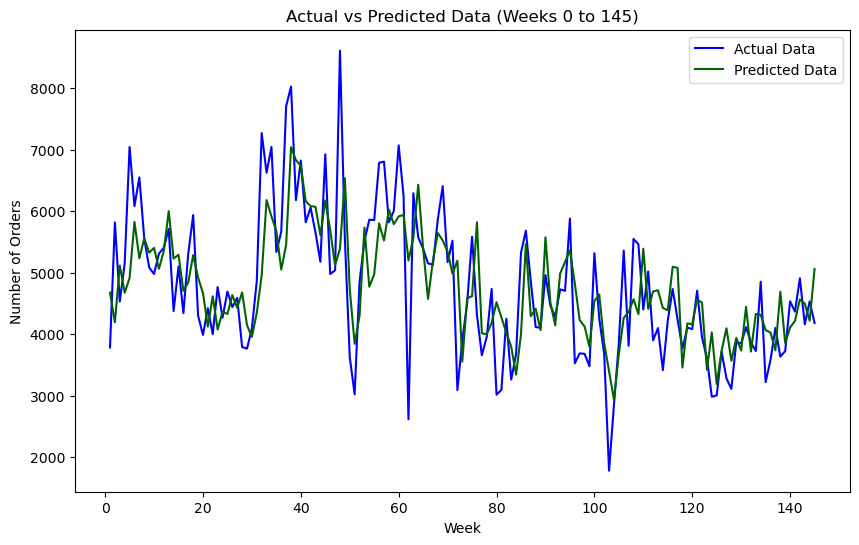

Predicted values (weeks 0 to 145):
week
1      4674.355219
2      4192.371977
3      5115.127102
4      4672.505837
5      4912.878936
          ...     
141    4215.061484
142    4563.811135
143    4497.705755
144    4217.705425
145    5058.893355
Length: 145, dtype: float64


In [46]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Get the fitted values (predicted data within the range of the original data)
predicted_values = model_fit_arimax.fittedvalues

# Plot actual vs fitted values
plt.figure(figsize=(10, 6))
plt.plot(weekly_orders_1, label='Actual Data', color='blue')
plt.plot(predicted_values, label='Predicted Data', color='darkgreen')
plt.title("Actual vs Predicted Data (Weeks 0 to 145)")
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

# Print the fitted values for weeks 0 to 145
print("Predicted values (weeks 0 to 145):")
print(predicted_values)
